Cardiovascular diseases are the most common cause of deaths globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Heart failure is a common event caused by Cardiovascular diseases. It is characterized by the heart’s inability to pump an adequate supply of blood to the body. Without sufficient blood flow, all major body functions are disrupted. Heart failure is a condition or a collection of symptoms that weaken the heart.



TABLE OF CONTENTS
IMPORTING LIBRARIES

LOADING DATA

DATA ANALYSIS

DATA PREPROCESSING

MODEL BUILDING

CONCLUSIONS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization,Dropout,LSTM
from keras.utils import to_categorical
from keras import callbacks
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('heart_failure_clinical_records_dataset (1).csv')
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


About the data:

age: Age of the patient
anaemia: If the patient had the haemoglobin below the normal range
creatinine_phosphokinase: The level of the creatine phosphokinase in the blood in mcg/L
diabetes: If the patient was diabetic
ejection_fraction: Ejection fraction is a measurement of how much blood the left ventricle pumps out with each contraction
high_blood_pressure: If the patient had hypertension
platelets: Platelet count of blood in kiloplatelets/mL
serum_creatinine: The level of serum creatinine in the blood in mg/dL
serum_sodium: The level of serum sodium in the blood in mEq/L
sex: The sex of the patient
smoking: If the patient smokes actively or ever did in past
time: It is the time of the patient's follow-up visit for the disease in months
DEATH_EVENT: If the patient deceased during the follow-up period

In [4]:
df.shape

(299, 13)

In [5]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

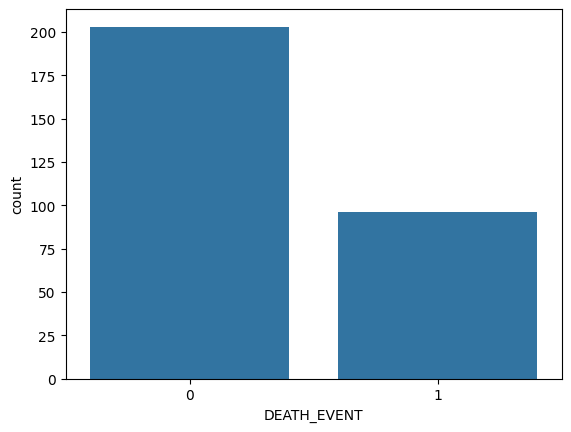

In [6]:
sns.countplot(x = df['DEATH_EVENT'])

<Axes: >

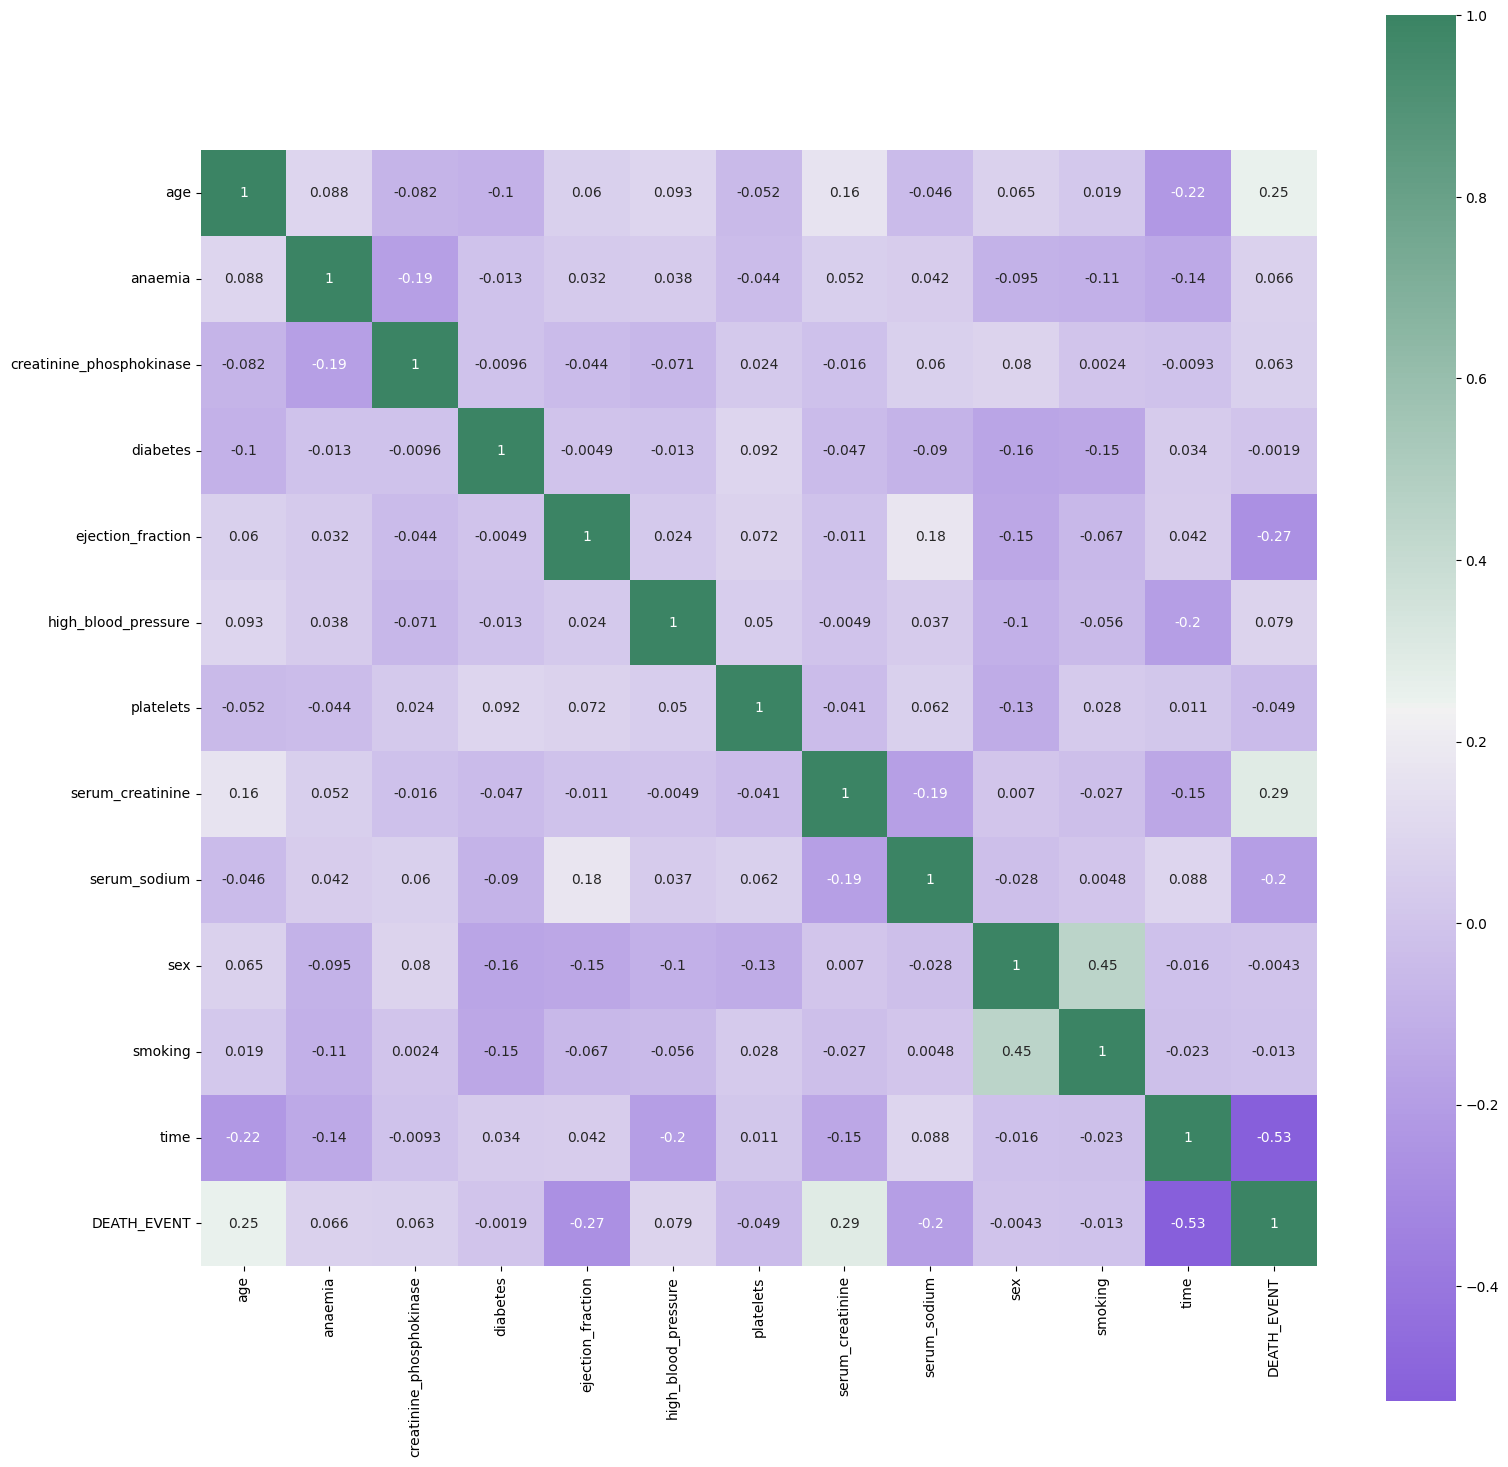

In [7]:
cmap=sns.diverging_palette(275,150,
    s=75,
    l=50,
    n=6,
    center='light',
    as_cmap=True )
corr=df.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corr,cmap=cmap,annot=True ,square=True)

In [8]:

import pandas as pd
from scipy.stats import pearsonr


alpha = 0.03

# Perform the hypothesis test
correlation_coefficient, p_value = pearsonr(df['age'], df['DEATH_EVENT'])

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between age  and DEATH_EVENT.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between age  and DEATH_EVENT .")

Reject the null hypothesis. There is a significant correlation between age  and DEATH_EVENT.


In [9]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [10]:

alpha = 0.05

# Perform the hypothesis test
correlation_coefficient, p_value = pearsonr(df['creatinine_phosphokinase'], df['DEATH_EVENT'])

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between creatinine_phosphokinase  and DEATH_EVENT.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between creatinine_phosphokinase  and DEATH_EVENT .")

Fail to reject the null hypothesis. There is no significant correlation between creatinine_phosphokinase  and DEATH_EVENT .


In [11]:

alpha = 0.03


# Perform the hypothesis test
correlation_coefficient, p_value = pearsonr(df['anaemia'], df['DEATH_EVENT'])

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between anaemia  and DEATH_EVENT.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between anaemia  and DEATH_EVENT .")

Fail to reject the null hypothesis. There is no significant correlation between anaemia  and DEATH_EVENT .


In [12]:

alpha = 0.05


# Perform the hypothesis test
correlation_coefficient, p_value = pearsonr(df['diabetes'], df['DEATH_EVENT'])

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between diabetes  and DEATH_EVENT.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between diabetes  and DEATH_EVENT .")

Fail to reject the null hypothesis. There is no significant correlation between diabetes  and DEATH_EVENT .


In [13]:

alpha = 0.05


# Perform the hypothesis test
correlation_coefficient, p_value = pearsonr(df['ejection_fraction'], df['DEATH_EVENT'])

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between ejection_fraction  and DEATH_EVENT.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between ejection_fraction  and DEATH_EVENT .")

Reject the null hypothesis. There is a significant correlation between ejection_fraction  and DEATH_EVENT.


In [14]:

alpha = 0.05


# Perform the hypothesis test
correlation_coefficient, p_value = pearsonr(df['high_blood_pressure'], df['DEATH_EVENT'])

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between high_blood_pressure  and DEATH_EVENT.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between high_blood_pressure  and DEATH_EVENT .")

Fail to reject the null hypothesis. There is no significant correlation between high_blood_pressure  and DEATH_EVENT .


In [15]:
alpha = 0.05
# Perform the hypothesis test
correlation_coefficient, p_value = pearsonr(df['platelets'], df['DEATH_EVENT'])

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between platelets  and DEATH_EVENT.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between platelets  and DEATH_EVENT .")

Fail to reject the null hypothesis. There is no significant correlation between platelets  and DEATH_EVENT .


In [16]:
alpha = 0.05
# Perform the hypothesis test
correlation_coefficient, p_value = pearsonr(df['serum_creatinine'], df['DEATH_EVENT'])

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between serum_creatinine  and DEATH_EVENT.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between serum_creatinine  and DEATH_EVENT .")

Reject the null hypothesis. There is a significant correlation between serum_creatinine  and DEATH_EVENT.


In [17]:
alpha = 0.05
# Perform the hypothesis test
correlation_coefficient, p_value = pearsonr(df['sex'], df['DEATH_EVENT'])

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between sex  and DEATH_EVENT.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between sex  and DEATH_EVENT .")

Fail to reject the null hypothesis. There is no significant correlation between sex  and DEATH_EVENT .


In [18]:
alpha = 0.05
# Perform the hypothesis test
correlation_coefficient, p_value = pearsonr(df['smoking'], df['DEATH_EVENT'])

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between smoking  and DEATH_EVENT.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between smoking  and DEATH_EVENT .")

Fail to reject the null hypothesis. There is no significant correlation between smoking  and DEATH_EVENT .


In [19]:
alpha = 0.05
# Perform the hypothesis test
correlation_coefficient, p_value = pearsonr(df['time'], df['DEATH_EVENT'])

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between time and DEATH_EVENT.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between time  and DEATH_EVENT .")

Reject the null hypothesis. There is a significant correlation between time and DEATH_EVENT.


In [20]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

<Axes: xlabel='age', ylabel='count'>

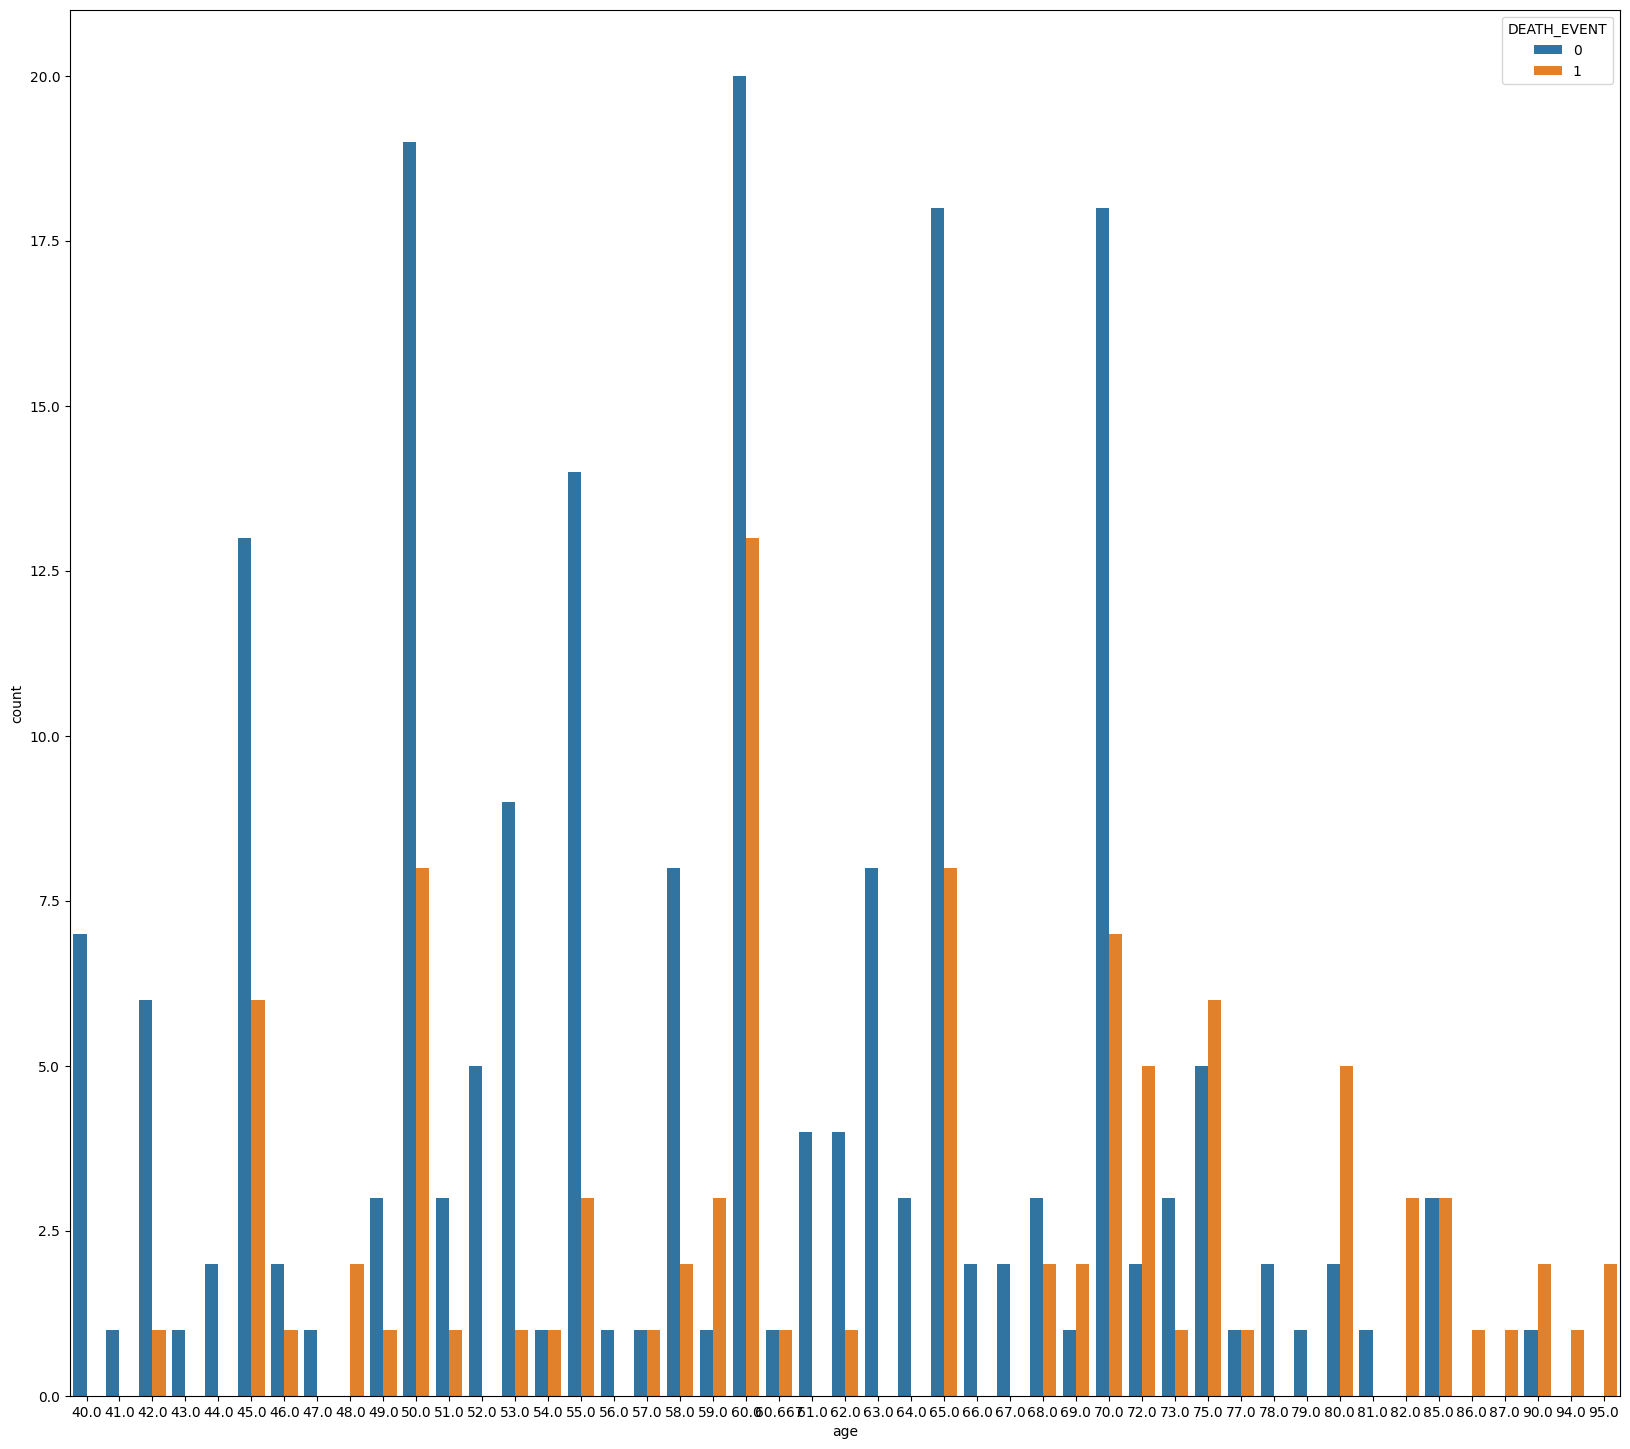

In [21]:
plt.figure(figsize=(20,18))
sns.countplot(x = df['age'],data=df,hue=df['DEATH_EVENT'])

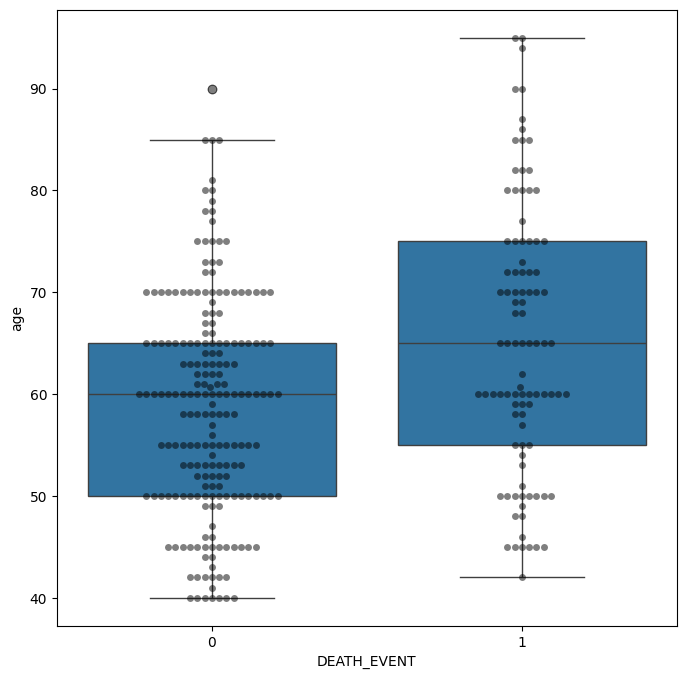

C:\Users\WELCOME\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3370: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


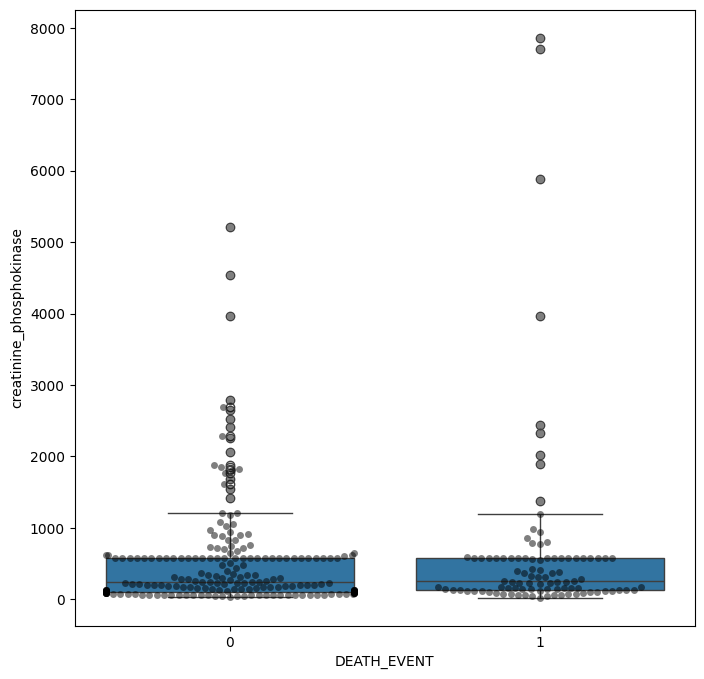

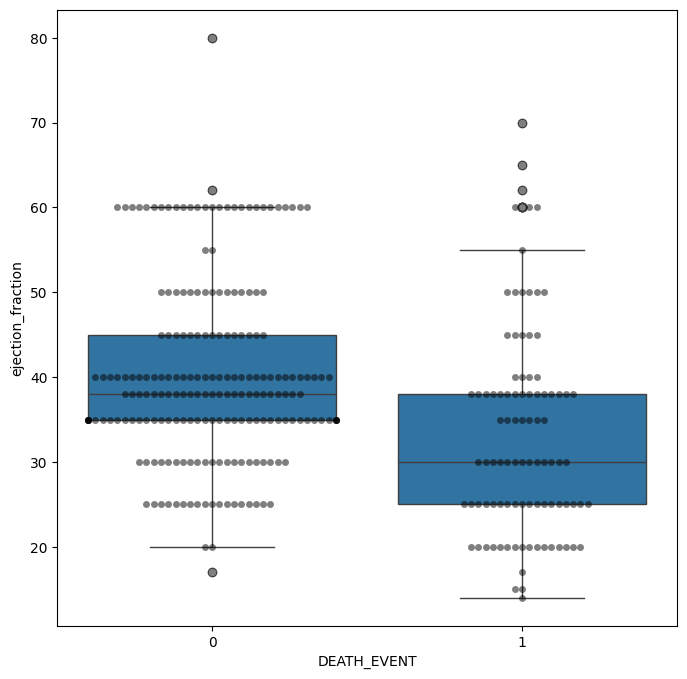

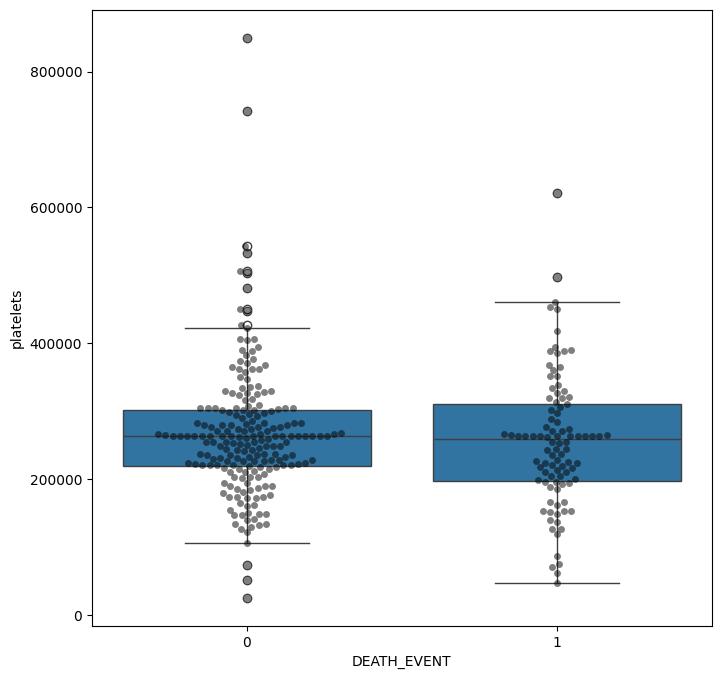

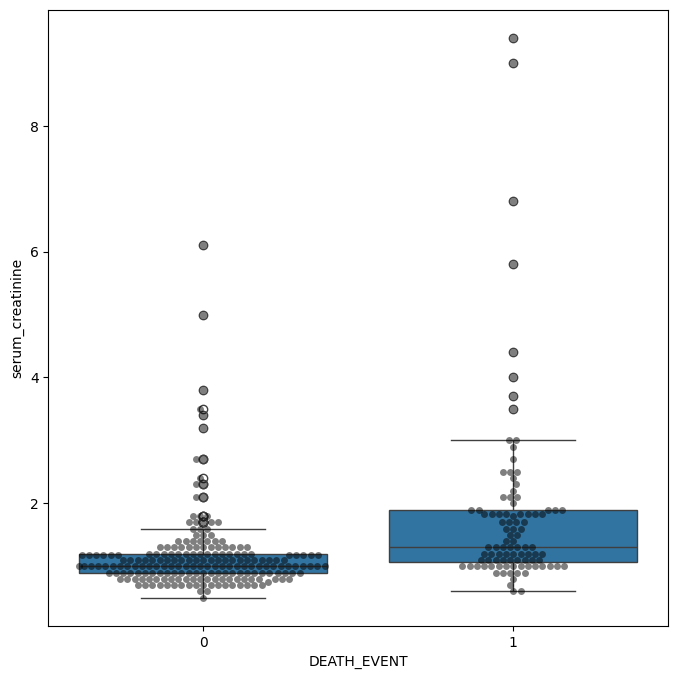

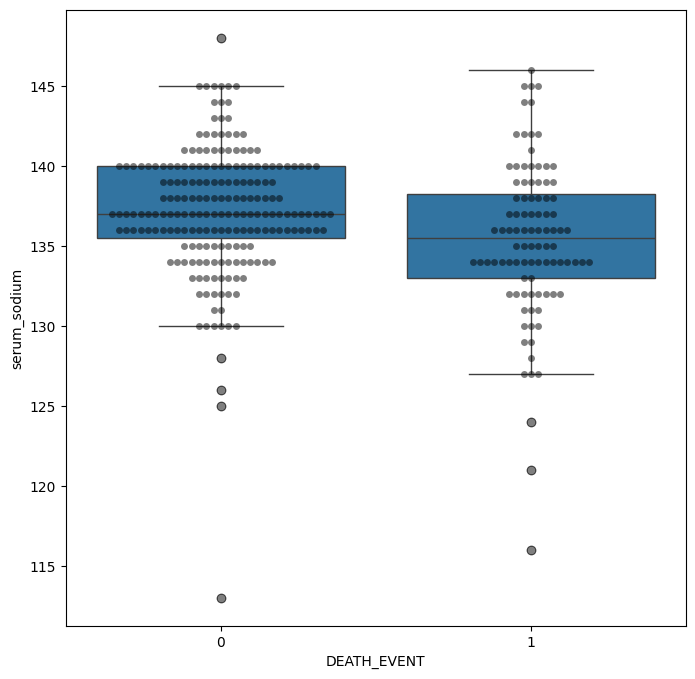

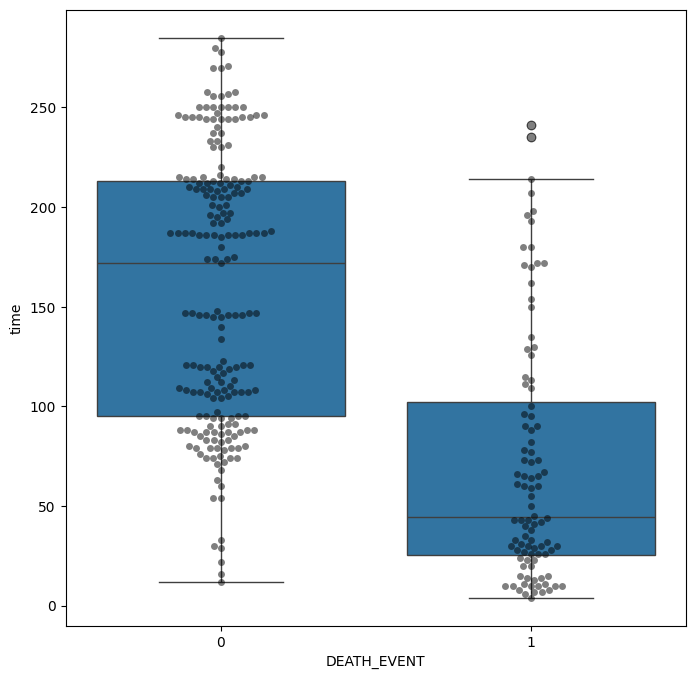

In [22]:
feature = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]
for i in feature:
    plt.figure(figsize=(8,8))
    sns.boxplot(x = df['DEATH_EVENT'],y=df[i] )
    sns.swarmplot(x = df['DEATH_EVENT'],y=df[i] ,color="black", alpha=0.5)
    plt.show()

<Axes: xlabel='time', ylabel='age'>

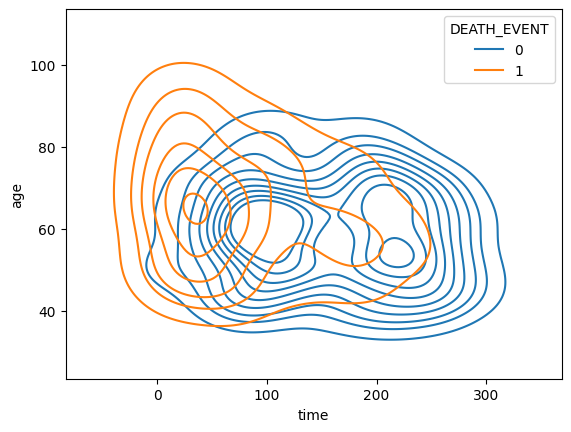

In [23]:
##It creates a Kernel Density Estimate plot, which is a smoothed representation of the distribution of the data.
sns.kdeplot( x=df['time'],
    y=df['age'],
    hue=df['DEATH_EVENT'],)

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


DATA PREPROCESSING
Steps involved in Data Preprocessing 

Dropping the outliers based on data analysis
Assigning values to features as X and target as y
Perform the scaling of the features
Split test and training sets

In [25]:
X = df.drop(['DEATH_EVENT'],axis=1)
y=df['DEATH_EVENT']

In [26]:
from sklearn import preprocessing
col= list(X.columns)
scalar= preprocessing.StandardScaler()
X_df=scalar.fit_transform(X)
X_df=pd.DataFrame(X_df,columns=col)
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


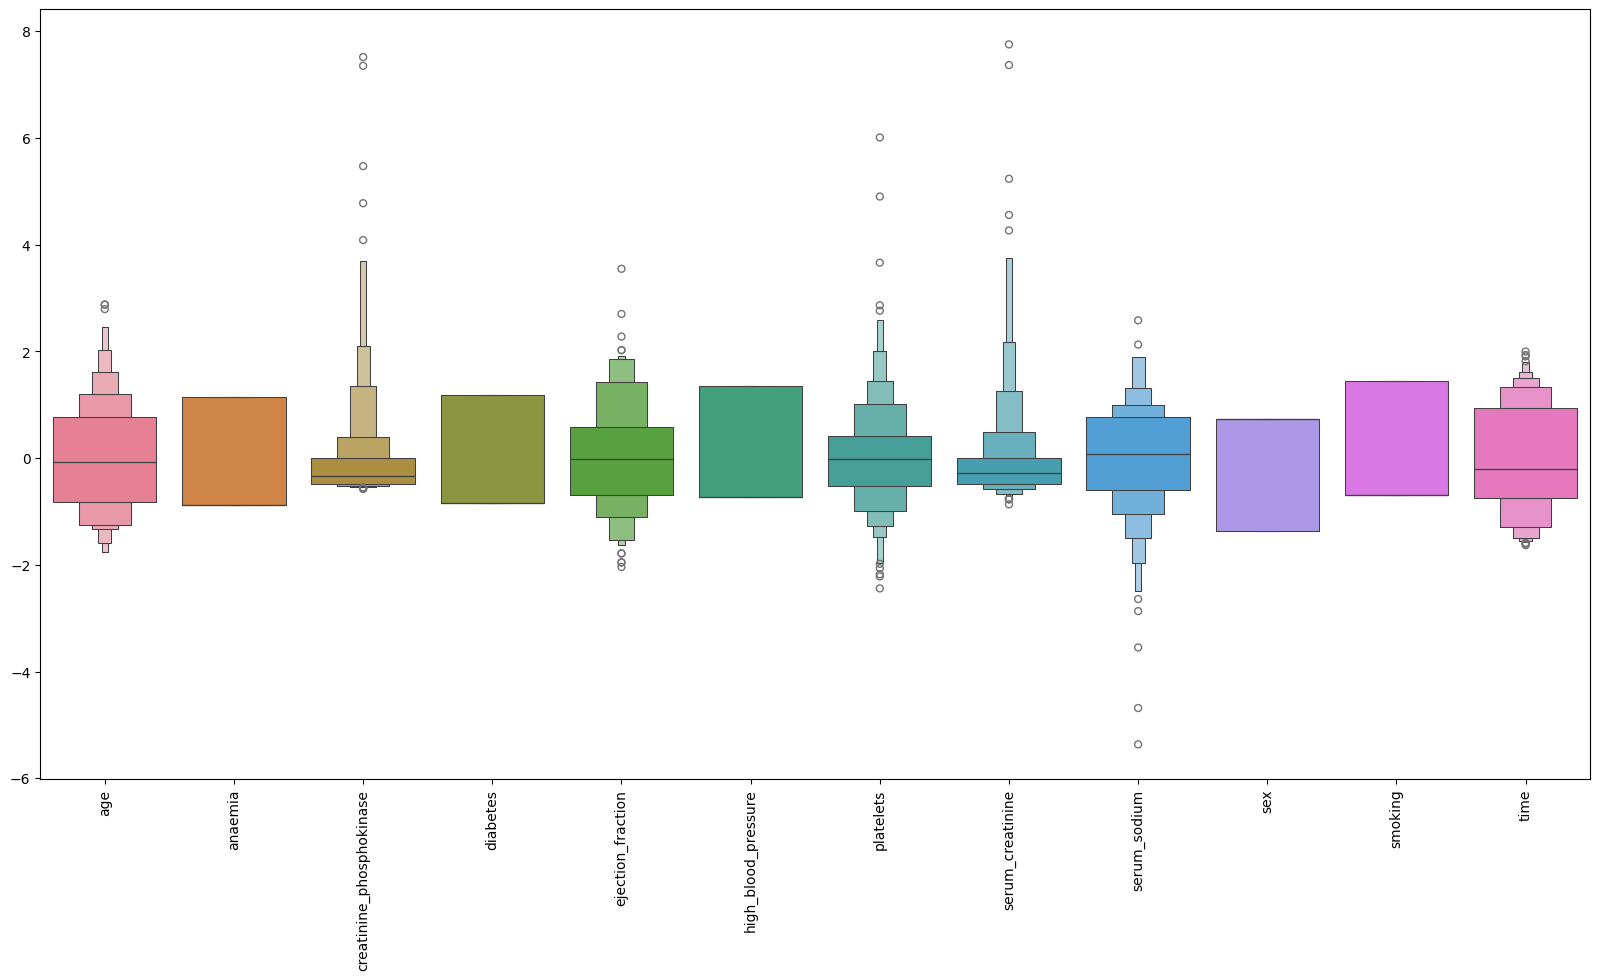

In [27]:

plt.figure(figsize=(20,10))
sns.boxenplot(data = X_df)
plt.xticks(rotation=90)
plt.show()

In [28]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.25,random_state=7)


MODEL BUILDING
In this project, we build an artificial neural network.

Following steps are involved in the model building

Initialising the ANN
Defining by adding layers
Compiling the ANN
Train the ANN

In [36]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units= 2, activation='leaky_relu', kernel_initializer='glorot_uniform'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
from keras.optimizers import SGD
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 50,callbacks=[early_stopping], validation_split=0.3)


Epoch 1/50


C:\Users\WELCOME\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.5750 - loss: 0.6930 - val_accuracy: 0.7353 - val_loss: 0.6922
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5923 - loss: 0.6926 - val_accuracy: 0.7353 - val_loss: 0.6912
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6014 - loss: 0.6922 - val_accuracy: 0.7353 - val_loss: 0.6902
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6253 - loss: 0.6914 - val_accuracy: 0.7353 - val_loss: 0.6890
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6474 - loss: 0.6904 - val_accuracy: 0.7353 - val_loss: 0.6879
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6023 - loss: 0.6908 - val_accuracy: 0.7353 - val_loss: 0.6868
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6235 - loss: 0.6897 - val_accuracy: 0.7353 - val_loss: 0.6857
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6205 - loss: 0.6893 - val_accuracy: 0.7353 - val_loss: 0.6845
Epoch 9/50


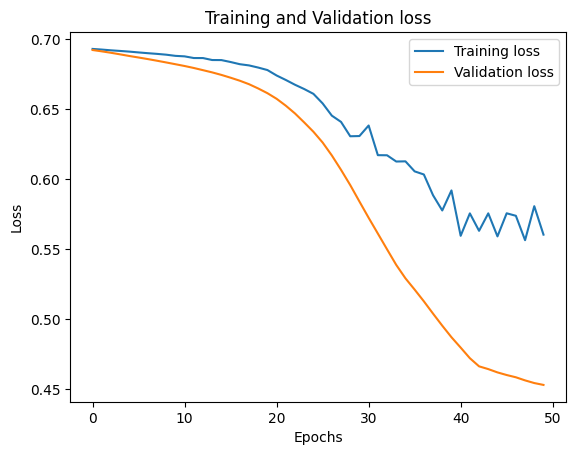

In [37]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']], label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()


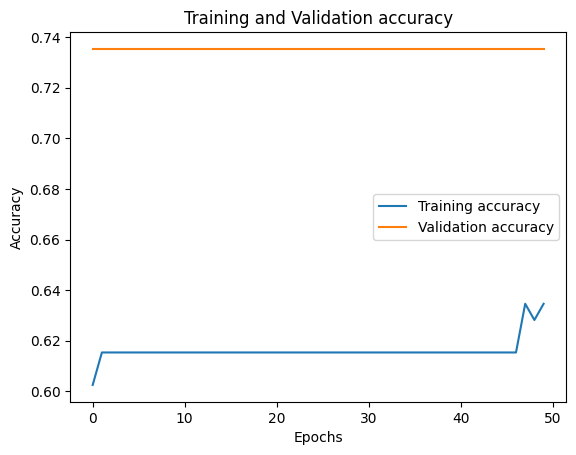

In [38]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']],  label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Concluding the model with:

Testing on the test set
Evaluating the confusion matrix
Evaluating the classification report

In [39]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


<Axes: >

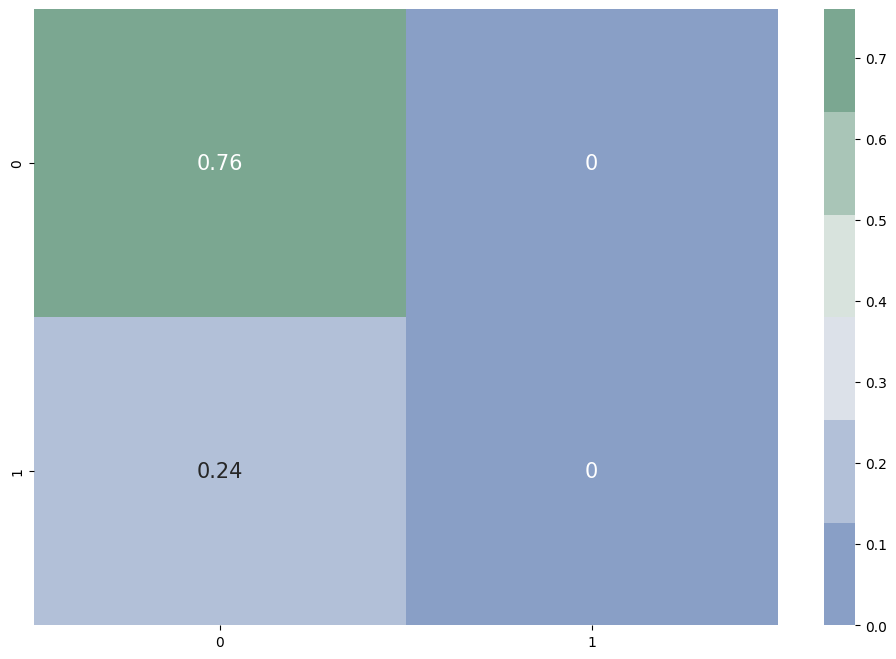

In [40]:
# confusion matrix
cmap1 = sns.diverging_palette(250,150,  s=40, l=65, n=6)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        57
           1       0.00      0.00      0.00        18

    accuracy                           0.76        75
   macro avg       0.38      0.50      0.43        75
weighted avg       0.58      0.76      0.66        75



C:\Users\WELCOME\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\WELCOME\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\WELCOME\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r